# SUJET : Credit Card Fraud Prediction

### Récupération des données


In [57]:
!pip install kaggle # Installation du MODULE KAGGLE

In [58]:
#Voici la commande API permettant de télécharger depuis "Kaggle" notre data base
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud
#La commande s'exécute en utilisant le symbole "!"


  0%|          | 0.00/28.9M [00:00<?, ?B/s]
  3%|3         | 1.00M/28.9M [00:01<00:33, 879kB/s]
  7%|6         | 2.00M/28.9M [00:02<00:31, 886kB/s]
 10%|#         | 3.00M/28.9M [00:03<00:30, 894kB/s]
 14%|#3        | 4.00M/28.9M [00:04<00:29, 898kB/s]
 17%|#7        | 5.00M/28.9M [00:05<00:27, 899kB/s]
 21%|##        | 6.00M/28.9M [00:07<00:27, 884kB/s]
 24%|##4       | 7.00M/28.9M [00:08<00:25, 887kB/s]
 28%|##7       | 8.00M/28.9M [00:09<00:24, 888kB/s]
 31%|###1      | 9.00M/28.9M [00:10<00:24, 867kB/s]
 35%|###4      | 10.0M/28.9M [00:11<00:22, 875kB/s]
 38%|###8      | 11.0M/28.9M [00:13<00:21, 880kB/s]
 42%|####1     | 12.0M/28.9M [00:14<00:20, 883kB/s]
 45%|####5     | 13.0M/28.9M [00:15<00:19, 858kB/s]
 48%|####8     | 14.0M/28.9M [00:16<00:17, 872kB/s]
 52%|#####1    | 15.0M/28.9M [00:17<00:16, 865kB/s]
 55%|#####5    | 16.0M/28.9M [00:19<00:15, 868kB/s]
 59%|#####8    | 17.0M/28.9M [00:20<00:14, 830kB/s]
 62%|######2   | 18.0M/28.9M [00:21<00:13, 851kB/s]
 66%|######5   | 19

### Setup

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv("credit_card_fraud.csv") #importation du jeux de données

### Exploration des données

In [97]:
df.head(12) # 12 premières lignes du dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [63]:
df.shape #permet de connaître la structure de notre DataFrame
# Notre base de données est constituée de 1 000 0000 d'observations et de 8 variables

(1000000, 8)

In [64]:
df.dtypes #permet de connaître le type de variables de notre DataFrame

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [65]:
#Vérification de la présence de valeurs catégoriques:
cat = (df.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables:")
print(object_cols)

#Pas besoin d'encoder les valeurs catégoriques en valeurs numériques

Categorical variables:
[]


In [66]:
#Affichage des doublons
df.duplicated().sum()

0

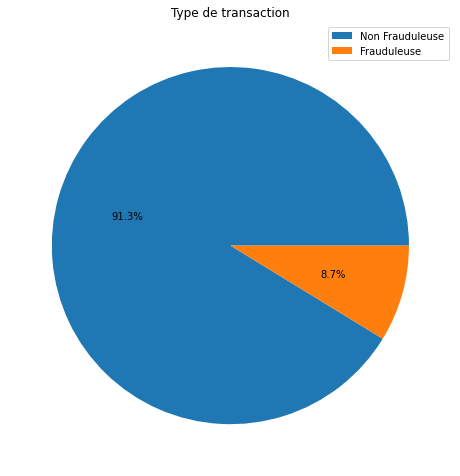

In [98]:
plt.subplots( figsize =(8, 10 ) ) #configuration de la taille du graphique
plt.title("Type de transaction")
plt.pie(data=df,x=df["fraud"].value_counts(),autopct='%1.1f%%')

plt.legend(['Non Frauduleuse', 'Frauduleuse'])

In [114]:
df.describe().T #donne les statistiques élémentaires des variables

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


### Traitement des valeurs manquantes

In [67]:
df.isnull() #pour détecter les valeurs manquantes ('True' = valeur manquante détectée)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [71]:
df.isnull().sum() #affiche la somme des valeurs manquantes par variable
#aucune valeur manquante dans notre base de données

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Détection des valeurs aberrantes (Outliers)

Avec la boîte à moustache :

Text(0.5, 1.0, 'BoxPlot de la variable')

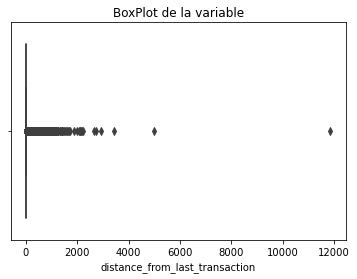

In [129]:
#On affiche le boxplot associé à la variable
sns.boxplot(df['distance_from_last_transaction'])
plt.title("BoxPlot de la variable")

#Il y a bien des valeurs aberrantes pour cette variable.

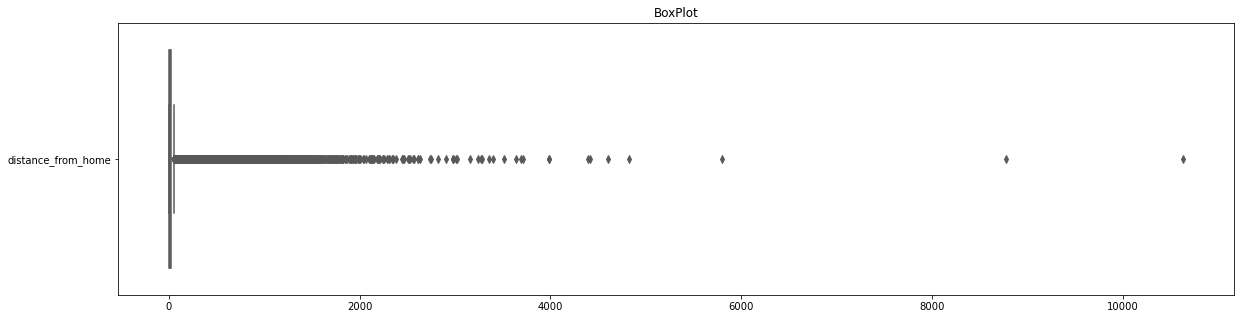

In [84]:
plt.figure(figsize = (20,5))
plt.title("BoxPlot")

df.describe()

df_1 = df[['distance_from_home']]

ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

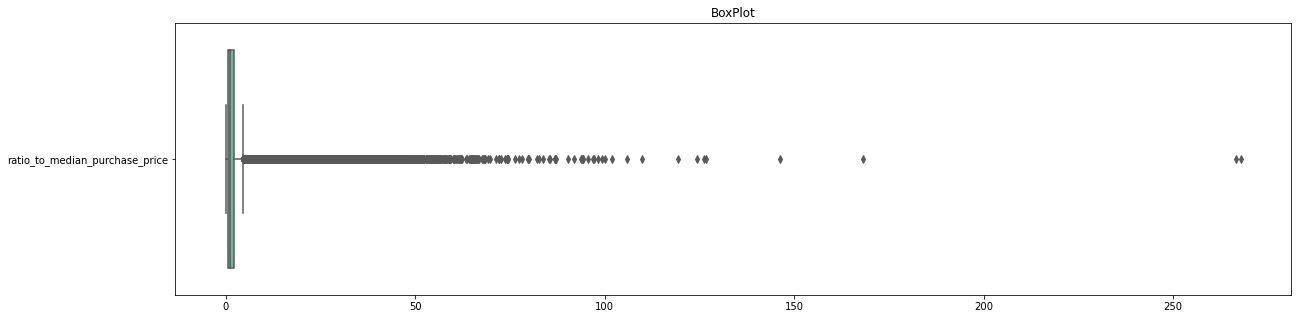

In [130]:
plt.figure(figsize = (20,5))
plt.title("BoxPlot")

df.describe()

df_1 = df[['ratio_to_median_purchase_price']]

ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler #On importe la fonction StandardScaler() de la librairie scikit learn

In [49]:
#pour mettre les données à la même échelle
scaler = StandardScaler()
scaler.fit(df[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price']])
df[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price']] = scaler.transform(df[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price']].values)

In [53]:
df.head(4)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0


### Features Selection

Nous sélectionnons les variables avec une corrélation positive ( > 0.1):

<AxesSubplot:title={'center':'Matrice des corrélations'}>

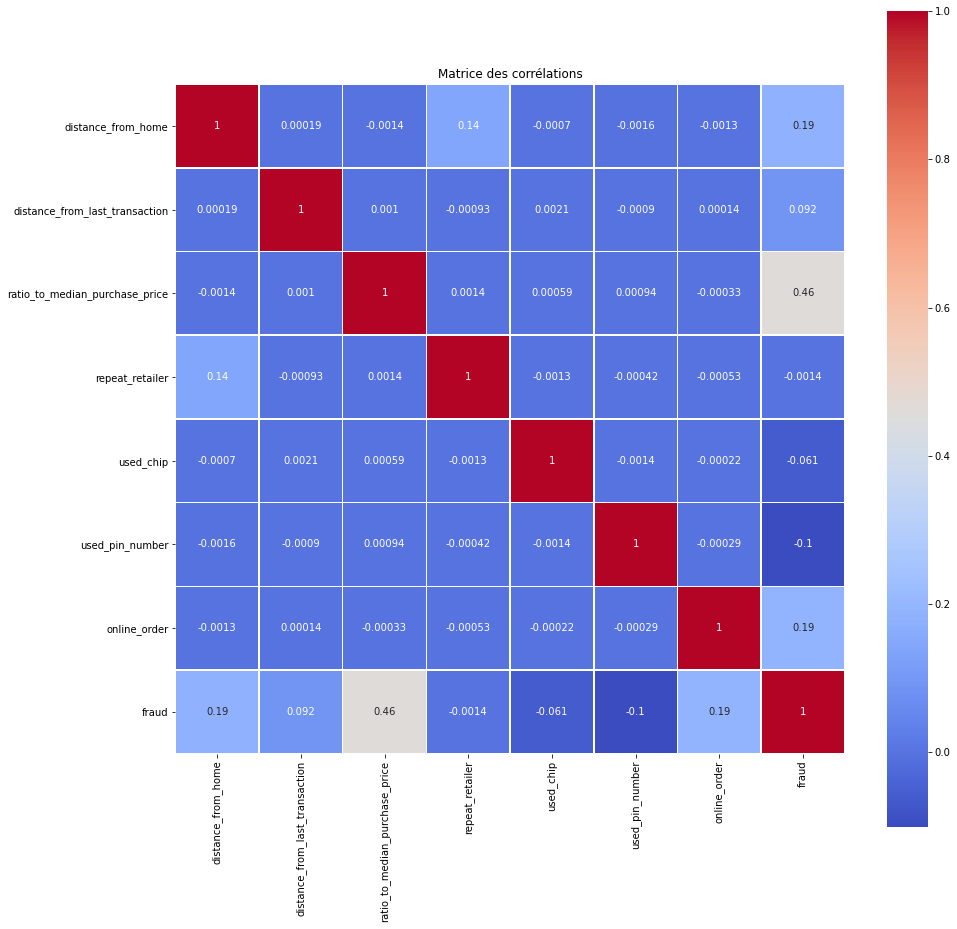

In [43]:
# Matrice des corrélations :

plt.subplots( figsize =( 15, 15 ) ) #configuration de la taille du graphique
plt.title("Matrice des corrélations")

cor = df.corr(method='pearson')
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=0.5,annot=True ) #paramètres graphiques

## Modélisation

#### Split du dataset en train et test

In [44]:
#Nous incluons dans la variable 'x' les variables explicatives du dataFrame.

x = df[['distance_from_home', 'ratio_to_median_purchase_price', 'online_order']]
y = df['fraud'] # la variable cible


In [45]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.25)

## Apprentissage

### Régression logistique :
On choisit de faire l'apprentissage sur un échantillon d'apprentissage de 75% des données et de faire le test sur 25% des données.

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #le module scikit-learn metrics pour le calcul de l'accuracy.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.94


In [127]:
# Confusion Matrix ( 1= fraude , 0 = pas fraude)
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0.0,1.0
Actual,,
0.0,225860,2312
1.0,12017,9811


### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier # Importation du Decision Tree Classifier

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.960352


### Random Forest :

In [26]:
#On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor

#On crée un Random Forest de 10 arbres 
rf = RandomForestRegressor(n_estimators = 10, random_state = 40)

#Et on lance le training sur notre dataset de train
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=40)

In [27]:
#On applique le modèle que l'on vient d'entraîner sur l'échantillon de test
predictions = rf.predict(x_test).round()

In [28]:
#On fait apparaître l'accuracy score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
accuracy_score(y_test, predictions)

0.968896

On calcule les variables d'importance du modèle, c'est à dire celles qui contribuent le plus :

In [30]:
#Ici, on affiche l’importance des variables de notre modèle de forêt aléatoire :
pd.DataFrame(rf.feature_importances_, index = x_train.columns, columns = 
             ["Importance"]).sort_values("Importance", ascending = False)

,Importance
ratio_to_median_purchase_price,0.548138
distance_from_home,0.231010
online_order,0.220852


### Rotation Forest :

In [31]:
from rotation_forest import RotationForestClassifier
from sklearn.metrics import confusion_matrix

In [32]:
model = RotationForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
a = confusion_matrix(y_pred, y_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.959992


### Conclusion

<BarContainer object of 4 artists>

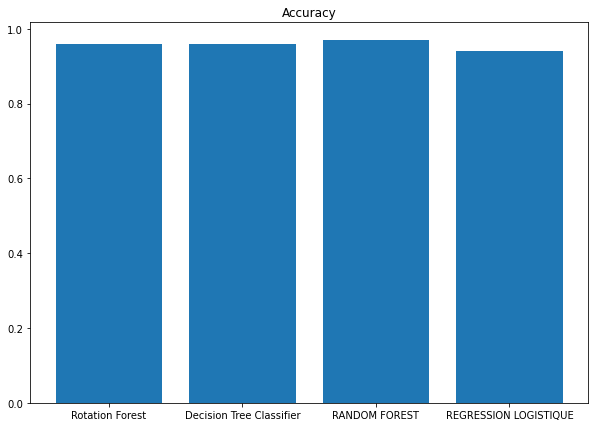

In [34]:
accuracies = [0.959992,0.960352,0.968896,0.94]

models=['Rotation Forest','Decision Tree Classifier','RANDOM FOREST','REGRESSION LOGISTIQUE']

plt.figure(figsize = (10,7))
plt.subplot(1,1,1)
plt.title('Accuracy')
plt.bar(models,accuracies)